In [1]:
#!pip install dexplot

In [2]:
#! pip install xgboost

# Necessary headers are imported for future analysis

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.metrics import accuracy_score 
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn import preprocessing
import matplotlib.pyplot as plt
import spacy
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.feature_selection import SelectFromModel
import xgboost as xgb
from xgboost import XGBClassifier
import dexplot as dxp
import math

#Visualisation
import gensim
from gensim import corpora

In [4]:
cd

C:\Users\Sonali MJ


In [5]:
%pwd

'C:\\Users\\Sonali MJ'

In [6]:
cd C:\Users\Sonali MJ\Documents\Python Scripts\business analytics\Abdul sir

C:\Users\Sonali MJ\Documents\Python Scripts\business analytics\Abdul sir


In [7]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [8]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [9]:
df1=df

In [10]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df1.shape

(7043, 21)

In [12]:
df1.size

147903

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [14]:
df1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
df1['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [16]:
df1['Churn'].value_counts(normalize=1)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [17]:
df1['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [18]:
df1['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [19]:
df1['MonthlyCharges'].value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
114.75     1
103.60     1
113.40     1
57.65      1
113.30     1
Name: MonthlyCharges, Length: 1585, dtype: int64

In [20]:
df1['TotalCharges'].value_counts()

           11
20.2       11
19.75       9
20.05       8
19.9        8
           ..
2917.5      1
1145.35     1
1301.7      1
2324.7      1
91.45       1
Name: TotalCharges, Length: 6531, dtype: int64

In [21]:
df1['TotalCharges'] = df1['TotalCharges'].replace(" ", 0.0).astype(float)

In [22]:
df1['TotalCharges'].head()

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [24]:
pd.crosstab(df1.gender,df1.Churn)

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


In [25]:
df1.groupby('SeniorCitizen')['Churn'].value_counts()

SeniorCitizen  Churn
0              No       4508
               Yes      1393
1              No        666
               Yes       476
Name: Churn, dtype: int64

In [26]:
pd.crosstab(df1.Contract,df1.Churn)

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


In [27]:
pd.crosstab(df1.gender,df1.InternetService)

InternetService,DSL,Fiber optic,No
gender,,,
Female,1188,1553,747
Male,1233,1543,779


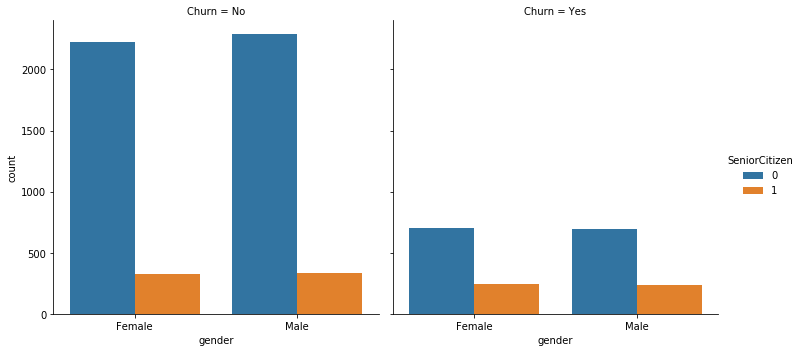

In [28]:
sns.catplot(x='gender',data=df1,hue='SeniorCitizen',col='Churn',kind='count') #distribution of gender with respect to customer churned

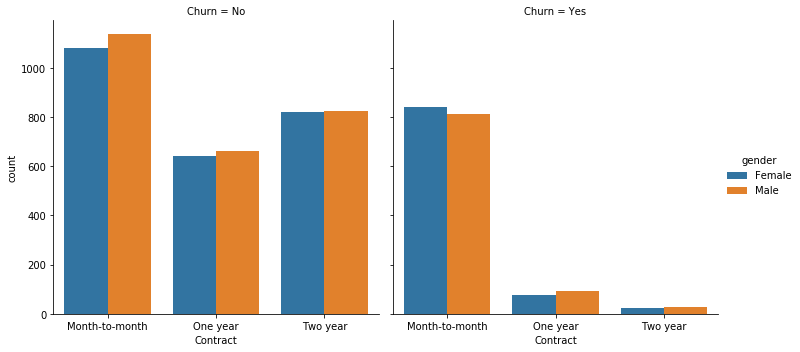

In [29]:
sns.catplot(x='Contract',data=df1,hue='gender',col='Churn',kind='count') #distribution of contracts with respect to gender and customer churned

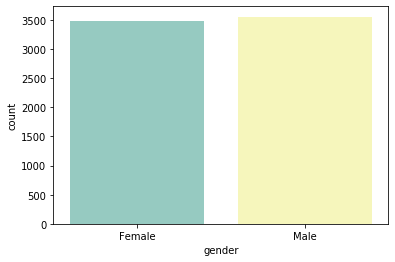

In [30]:
sns.countplot(x='gender',data=df1,palette="Set3") #Distribution of gender

In [31]:
df1['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [32]:
df1['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

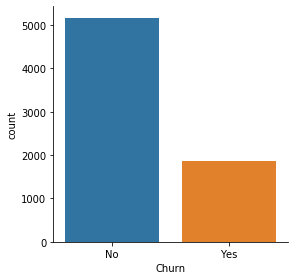

In [33]:
sns.catplot(x="Churn", kind="count", data=df1,height=4) #distribution of customer churned

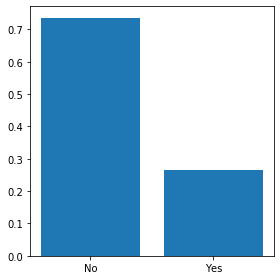

In [34]:
dxp.aggplot(agg="Churn", data=df1,normalize='all',figsize=(4, 4)) #distribution of churned

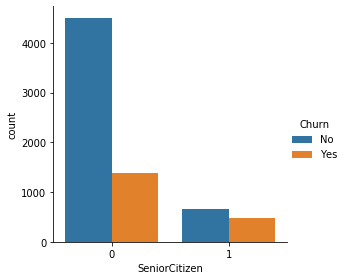

In [35]:
sns.catplot(x='SeniorCitizen', kind="count", hue='Churn',data=df1,height=4) #no. of citizenship churned

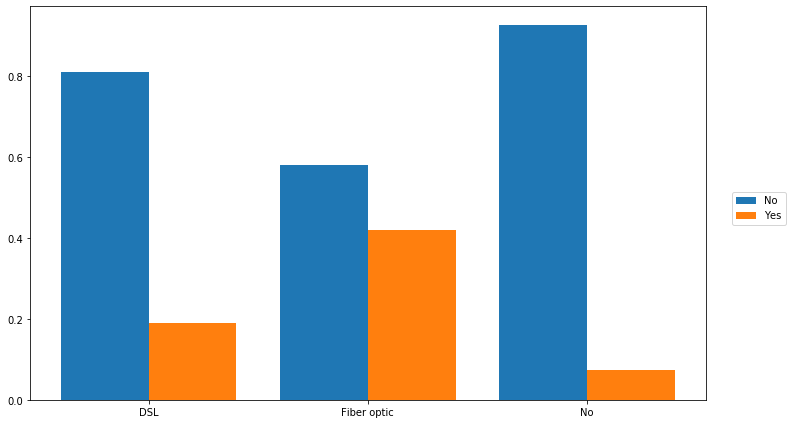

In [36]:
dxp.aggplot(agg='InternetService', data=df1, hue='Churn',normalize='InternetService',figsize=(10, 6)) #Distribution of customers churning with respect to the internet service they have opted

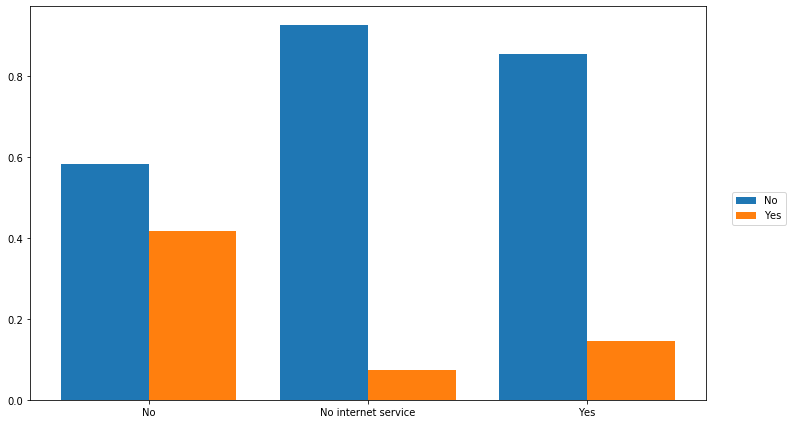

In [37]:
dxp.aggplot(agg='OnlineSecurity', data=df1, hue='Churn',normalize='OnlineSecurity',figsize=(10, 6))

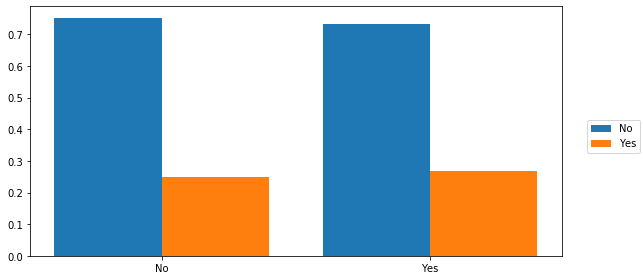

In [38]:
dxp.aggplot(agg='PhoneService', data=df1, hue='Churn',normalize='PhoneService',figsize=(8, 4))

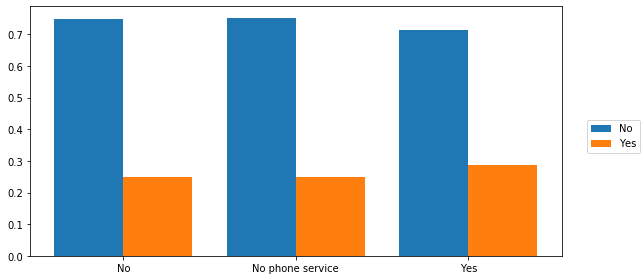

In [39]:
dxp.aggplot(agg='MultipleLines', data=df1, hue='Churn',normalize='MultipleLines',figsize=(8, 4))

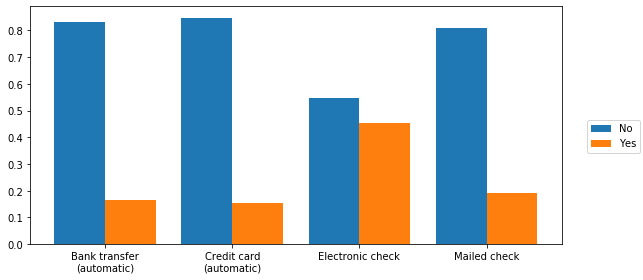

In [40]:
dxp.aggplot(agg='PaymentMethod', data=df1, hue='Churn',normalize='PaymentMethod',figsize=(8, 4))#Distribution of customer churning with respect to the payment method

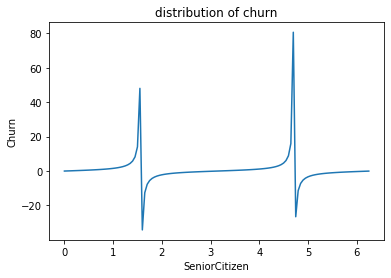

In [41]:
x = np.arange(0, math.pi*2, 0.05)
y = np.tan(x)
plt.plot(x,y)
plt.xlabel("SeniorCitizen")
plt.ylabel("Churn")
plt.title('distribution of churn')
plt.show()

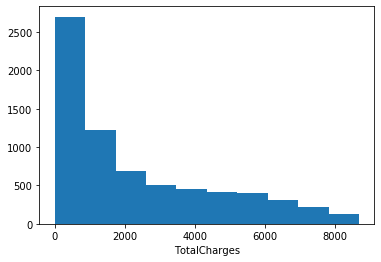

In [42]:
plt.xlabel('TotalCharges') #xlable is use tolable the axis
plt.hist(df1['TotalCharges'])
plt.show()

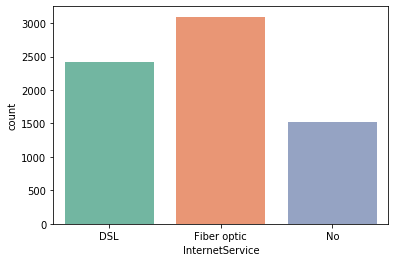

In [43]:
#Which Internet service mostly provied by the telecom department?
sns.countplot(x='InternetService',data=df1, palette="Set2")

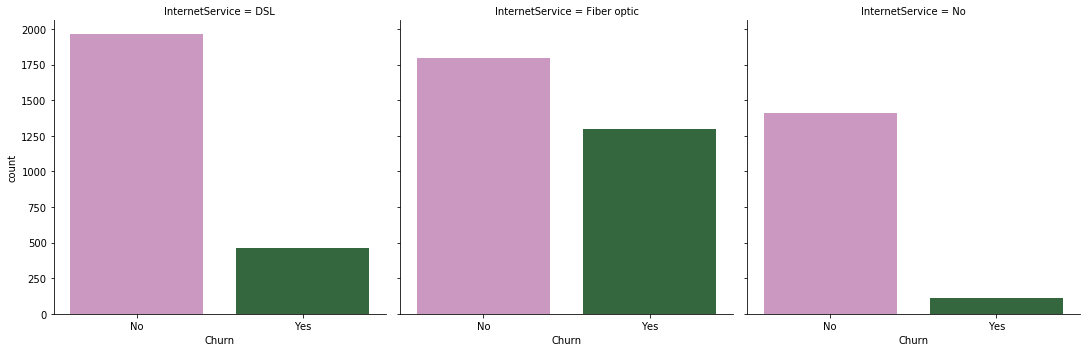

In [44]:
sns.catplot(x='Churn',data=df1,palette='cubehelix_r',col='InternetService',kind='count')#Distribution of churn with respect to Internet services

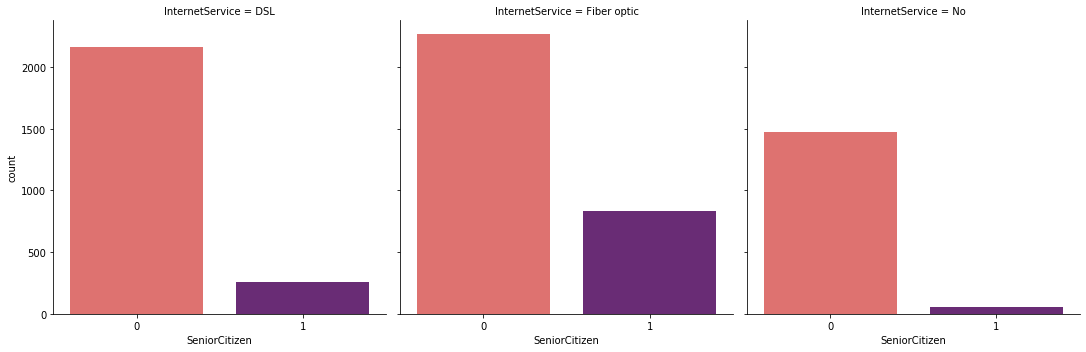

In [45]:
sns.catplot(x='SeniorCitizen',data=df1,palette='magma_r',col='InternetService',kind='count')# distribution of seniorcitizen those who have Interenetservices

In [46]:
df1["Churn"]=df1["Churn"].replace({"Yes":1,"No":0})

In [47]:
df1.groupby(['TechSupport','gender'])['Churn'].mean()

TechSupport          gender
No                   Female    0.418903
                     Male      0.413872
No internet service  Female    0.074967
                     Male      0.073171
Yes                  Female    0.160662
                     Male      0.142576
Name: Churn, dtype: float64

In [48]:
df1['Churn'].mean()

0.2653698707936959

In [49]:
df1['Churn'].head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [50]:
df1.groupby(['InternetService','OnlineSecurity'])['Churn'].mean()

InternetService  OnlineSecurity     
DSL              No                     0.279613
                 Yes                    0.094915
Fiber optic      No                     0.493576
                 Yes                    0.218117
No               No internet service    0.074050
Name: Churn, dtype: float64

In [51]:
df1.groupby(['TechSupport','InternetService'])['Churn'].mean()


TechSupport          InternetService
No                   DSL                0.277554
                     Fiber optic        0.493722
No internet service  No                 0.074050
Yes                  DSL                0.096774
                     Fiber optic        0.226328
Name: Churn, dtype: float64

In [52]:
df1.groupby(['gender'])['Churn'].mean()

gender
Female    0.269209
Male      0.261603
Name: Churn, dtype: float64

In [53]:
df1.groupby(['TotalCharges','MonthlyCharges'])['Churn'].describe()

count  mean  std  min  25%  50%  75%  max
TotalCharges MonthlyCharges                                           
0.00         19.70             1.0   0.0  NaN  0.0  0.0  0.0  0.0  0.0
             19.85             1.0   0.0  NaN  0.0  0.0  0.0  0.0  0.0
             20.00             1.0   0.0  NaN  0.0  0.0  0.0  0.0  0.0
             20.25             1.0   0.0  NaN  0.0  0.0  0.0  0.0  0.0
             25.35             1.0   0.0  NaN  0.0  0.0  0.0  0.0  0.0
...                            ...   ...  ...  ...  ...  ...  ...  ...
8564.75      116.25            1.0   0.0  NaN  0.0  0.0  0.0  0.0  0.0
8594.40      116.95            1.0   0.0  NaN  0.0  0.0  0.0  0.0  0.0
8670.10      117.50            1.0   0.0  NaN  0.0  0.0  0.0  0.0  0.0
8672.45      118.75            1.0   0.0  NaN  0.0  0.0  0.0  0.0  0.0
8684.80      117.80            1.0   1.0  NaN  1.0  1.0  1.0  1.0  1.0

[6789 rows x 8 columns]

In [54]:
df1.groupby(['gender','TotalCharges','MonthlyCharges'])['Churn'].describe()

count  mean  std  min  25%  50%  75%  max
gender TotalCharges MonthlyCharges                                           
Female 0.00         20.00             1.0   0.0  NaN  0.0  0.0  0.0  0.0  0.0
                    52.55             1.0   0.0  NaN  0.0  0.0  0.0  0.0  0.0
                    56.05             1.0   0.0  NaN  0.0  0.0  0.0  0.0  0.0
                    73.35             1.0   0.0  NaN  0.0  0.0  0.0  0.0  0.0
                    80.85             1.0   0.0  NaN  0.0  0.0  0.0  0.0  0.0
...                                   ...   ...  ...  ...  ...  ...  ...  ...
Male   8468.20      114.05            1.0   0.0  NaN  0.0  0.0  0.0  0.0  0.0
       8547.15      118.20            1.0   0.0  NaN  0.0  0.0  0.0  0.0  0.0
       8564.75      116.25            1.0   0.0  NaN  0.0  0.0  0.0  0.0  0.0
       8594.40      116.95            1.0   0.0  NaN  0.0  0.0  0.0  0.0  0.0
       8684.80      117.80            1.0   1.0  NaN  1.0  1.0  1.0  1.0  1.0

[6869 rows x 8 columns]

{'whiskers': [<matplotlib.lines.Line2D at 0x1e91c35f1c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1e91c35f708>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e91b35d348>],
 'medians': [<matplotlib.lines.Line2D at 0x1e91c377588>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e91c358dc8>],
 'means': []}

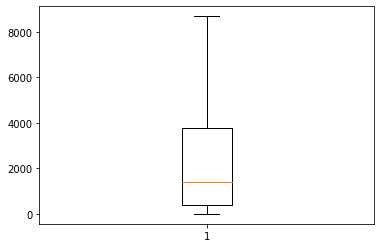

In [55]:
plt.boxplot(df1['TotalCharges'])#More thhan 75% data are in 18-4000 bucks

# Pairplot of Churn with respect to relative factors below

C:\Users\Sonali MJ\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Sonali MJ\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


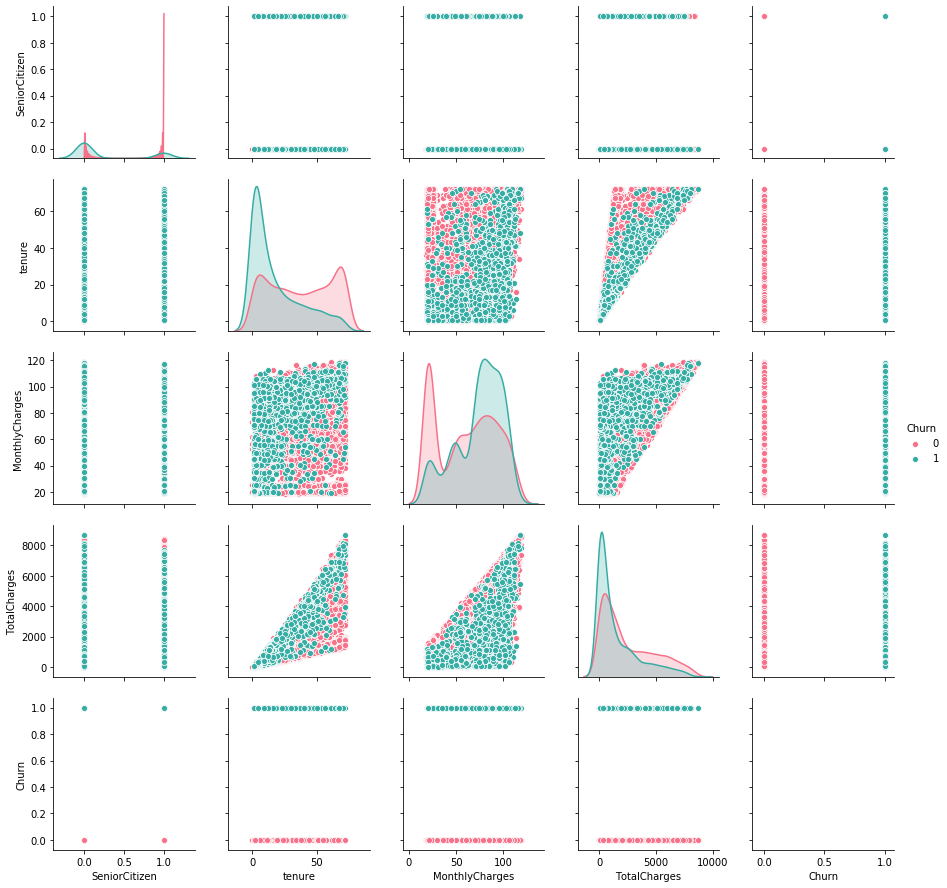

In [56]:
sns.pairplot(data=df1, hue="Churn", palette="husl")

# Districution of churn with respect to Tenure

C:\Users\Sonali MJ\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


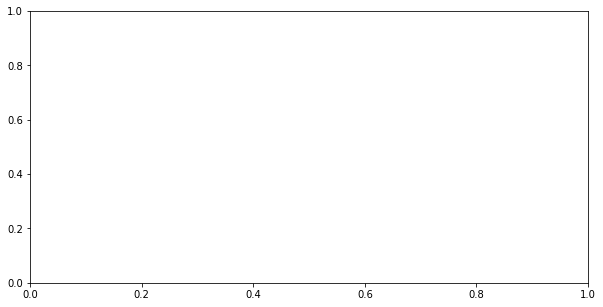

In [57]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df[df['Churn'] == 'No']['tenure'], color= 'red',shade=True, label= 'Churn: No')
sns.kdeplot(df[df['Churn'] == 'Yes']['tenure'], color= 'green',shade=True, label= 'Churn: Yes')


# Distribution of customer churning with respect to billing mode

(<Figure size 720x432 with 2 Axes>,)

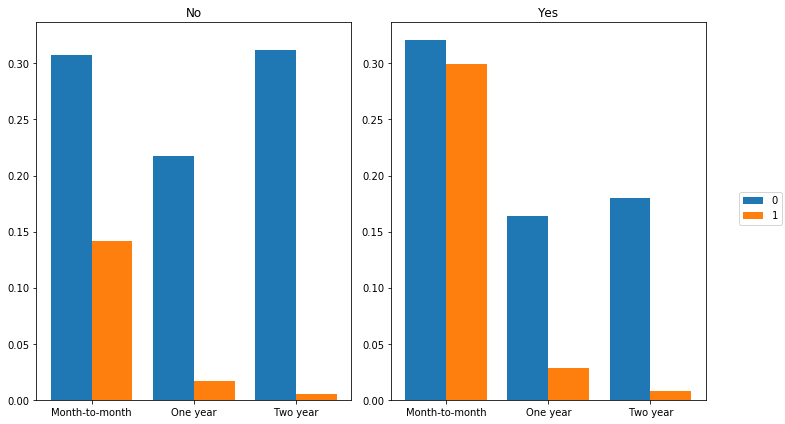

In [58]:
dxp.aggplot(agg='Contract', data=df1, hue='Churn', kind='bar',col='PaperlessBilling',normalize='PaperlessBilling',figsize=(10, 6))

# Churn prediction

In [59]:
le=LabelEncoder()

In [60]:
df2=df1

In [61]:
for i in df2.columns[:-1]:
    df2[i]=le.fit_transform(df2[i])

df2.head()   #converting into label encoding

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,142,75,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,498,3625,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,436,537,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,266,3571,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,729,675,1


In [62]:
for i in df2.columns:
    print(df2[i].value_counts())

2047    1
5368    1
1242    1
3291    1
5344    1
       ..
4687    1
2644    1
597     1
6742    1
0       1
Name: customerID, Length: 7043, dtype: int64
1    3555
0    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
0    3641
1    3402
Name: Partner, dtype: int64
0    4933
1    2110
Name: Dependents, dtype: int64
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
1    6361
0     682
Name: PhoneService, dtype: int64
0    3390
2    2971
1     682
Name: MultipleLines, dtype: int64
1    3096
0    2421
2    1526
Name: InternetService, dtype: int64
0    3498
2    2019
1    1526
Name: OnlineSecurity, dtype: int64
0    3088
2    2429
1    1526
Name: OnlineBackup, dtype: int64
0    3095
2    2422
1    1526
Name: DeviceProtection, dtype: int64
0    3473
2    2044
1    1526
Name: TechSupport, dtype: int64
0    2810
2    2707
1    1526
Name: StreamingTV, dtype: 

In [63]:
onehotencoder=OneHotEncoder(categorical_features='all')
encoded=onehotencoder.fit_transform(df2).toarray()

C:\Users\Sonali MJ\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Sonali MJ\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:441: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. The passed value of 'all' is the default and can simply be removed.
  DeprecationWarning)


In [64]:
df2_encoded=pd.DataFrame(encoded)
df2_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Columns: 15277 entries, 0 to 15276
dtypes: float64(15277)
memory usage: 820.9 MB


In [65]:
df2_encoded.head()

,0,1,2,3,4,5,6,7,8,9,...,15267,15268,15269,15270,15271,15272,15273,15274,15275,15276
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [66]:
df2.head() #converting all categorical column into 0& 1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,142,75,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,498,3625,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,436,537,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,266,3571,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,729,675,1


In [67]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,142,75,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,498,3625,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,436,537,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,266,3571,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,729,675,1


In [68]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,142,75,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,498,3625,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,436,537,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,266,3571,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,729,675,1


In [69]:
df=df.drop(columns='customerID') #as this column is not necesaary

In [70]:
x=df.drop(columns='Churn') #takes all the features as 'x'
y=df['Churn'].copy()       #takes the target feature as 'y'


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2) #spliting the data

# logistic regression

In [71]:
logistic_r = LogisticRegression()

#training the model
logistic_r.fit(x_train, y_train)

#evaluating with the test data
y_pred = logistic_r.predict(x_test) 

#accuracy score
score =accuracy_score(y_test,y_pred) 
print("Logistic Regression  Accuracy is ")
print(score*100)

#confusion matrix
c_m=confusion_matrix(y_test, y_pred) 

c_m

C:\Users\Sonali MJ\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression  Accuracy is 
81.68914123491838


array([[953,  85],
       [173, 198]], dtype=int64)

# Neural network

In [72]:
model = MLPClassifier(hidden_layer_sizes=(100,50,40))   # hidden Layers

#training the model
model.fit(x_train, y_train) 

#evaluating with test data
predicted_classes = model.predict(x_test) 

# accuracy Percentage
accuracy = accuracy_score(y_test,predicted_classes) 
print("Neural Network Accuracy is ")
print(accuracy*100)

#confusion Matrix
c_m=confusion_matrix(y_test, y_pred)
c_m


Neural Network Accuracy is 
68.13342796309439


array([[953,  85],
       [173, 198]], dtype=int64)

# Feature importance using XGB

Accuracy: 81.26%


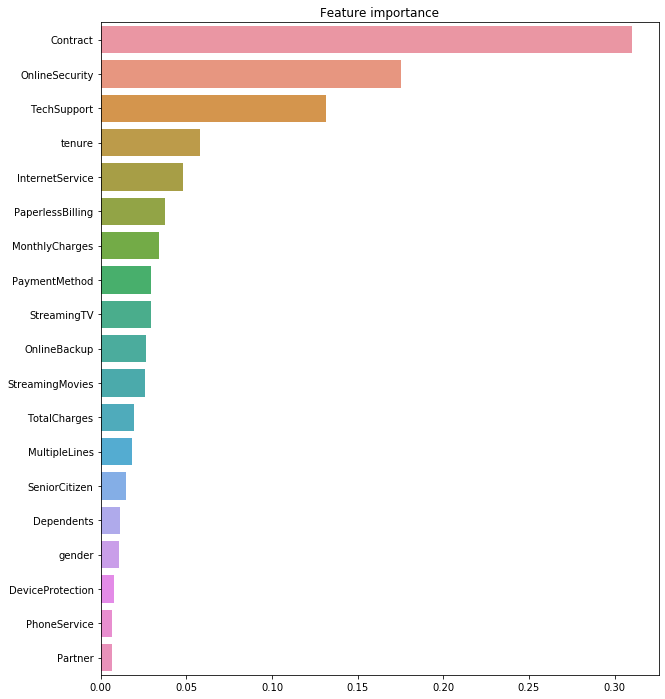

In [73]:
model = XGBClassifier()
model.fit(x_train, y_train)
# make predictions for test data and evaluate
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


imp = pd.Series(data=model.feature_importances_, index=x.columns).sort_values(ascending=False) 
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, orient='h')

# Random forest

In [74]:
clf = RandomForestClassifier(n_estimators=100)

#Training the model
clf.fit(x_train, y_train) 

#evaluating the test data
predicted_classes = clf.predict(x_test) 

#Accuracy Percentage
accuracy = accuracy_score(y_test,predicted_classes)
print("random forest Accuracy is ")
print(accuracy*100)

#confusion Matrix
c_m=confusion_matrix(y_test, y_pred)
c_m

random forest Accuracy is 
78.99219304471256


array([[946,  92],
       [172, 199]], dtype=int64)

# Feature selection

In [77]:
from numpy import sort

In [78]:
# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(x_train)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(x_test)
    y_pred = selection_model.predict(select_X_test)
    #predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, y_pred)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.006, n=19, Accuracy: 81.26%
Thresh=0.006, n=18, Accuracy: 81.26%
Thresh=0.008, n=17, Accuracy: 81.12%
Thresh=0.011, n=16, Accuracy: 81.26%
Thresh=0.011, n=15, Accuracy: 81.12%
Thresh=0.015, n=14, Accuracy: 80.84%
Thresh=0.018, n=13, Accuracy: 81.41%
Thresh=0.019, n=12, Accuracy: 81.12%
Thresh=0.026, n=11, Accuracy: 80.77%
Thresh=0.026, n=10, Accuracy: 81.05%
Thresh=0.029, n=9, Accuracy: 81.26%
Thresh=0.030, n=8, Accuracy: 81.33%
Thresh=0.034, n=7, Accuracy: 80.91%
Thresh=0.038, n=6, Accuracy: 80.13%
Thresh=0.048, n=5, Accuracy: 79.49%
Thresh=0.058, n=4, Accuracy: 78.71%
Thresh=0.132, n=3, Accuracy: 77.50%
Thresh=0.175, n=2, Accuracy: 75.30%
Thresh=0.310, n=1, Accuracy: 73.67%


# K-means clustering

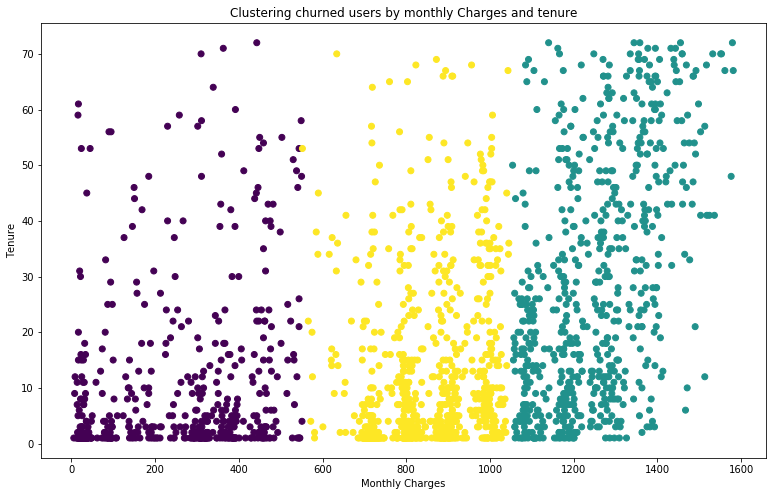

In [79]:
monthly_tenure = df[['MonthlyCharges','tenure']][df.Churn == 1] # considering only the customers who have churned
kmeans = KMeans(n_clusters = 3, random_state = 42).fit(monthly_tenure) # Three clusters

monthly_tenure['cluster'] = kmeans.labels_

plt.subplots(figsize=(13,8))

#plotting in scatter plot
plt.scatter( monthly_tenure['MonthlyCharges'], monthly_tenure['tenure'],
           c = monthly_tenure['cluster'])

plt.title('Clustering churned users by monthly Charges and tenure')
plt.xlabel('Monthly Charges')
plt.ylabel('Tenure')


plt.show()